Summary:

1. Investigation of each feature, independently:
- a histogram of every feature was examined to understand the data distribution for each category
    - Unfortunately, for most categories, most datapoints clustered around certain segments, which is not ideal for a regression analysis
- plotted distribution of prices (aggregrate of all cities)
    - mean around 200 USD
- plotted mean price and IQR of each respective city
    - each cities' mean and dispersion varied widely, each city has individual pricing dynamics
- plotted underlying price distributions of each respective city 
 
2. Investigating relationships between feature/s vs price:    
- every feature in this dataset was plotted against price (and separated into cities) to visualize their respective relationships more conspiciously. 

    - there exists robust demand for luxury and ultra-luxury segment; Airbnb should investigate more closely the supply-demand characteristics of this segment
    - person capacity vs price possesses a strong relationship
    - separation by room type: 
        - Athens, Rome, Lisbon very little entire rooms, why?
    - Room type vs city vs price
    - Premium markets demonstrate a strong premium and price gap above middle-tier, suggesting there is strong demand luxury segment

EDA Discovery:
- Berlin and Barcelona - disproportionately low amount of entire rooms/apts, why? Perhaps this can be increased
- Budapest and Athens - disproportionate low amount of private rooms, why? Perhaps this can be increased

- More granular details regarding each chart is explicated below


Recommendations:
- Separate linear regressions should be conducted for each individual city. 
- Furthermore, for each additional city, separate linear regressions should be computed for each price segment - i.e. bargain, economic, luxury, ultra-luxury

In [18]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [19]:
eurobnb = pd.read_csv('eurobnb.csv')

In [20]:
eurobnb.drop(columns=('Unnamed: 0'), inplace=True)

In [21]:
#Re-examing the main features of this column again
eurobnb.head(4).T

0                1                2  \
Price                       129.824479       138.963748       156.304923   
Room Type              Entire home/apt  Entire home/apt  Entire home/apt   
Shared Room                      False            False            False   
Private Room                     False            False            False   
Person Capacity                    4.0              4.0              3.0   
Superhost?                       False             True             True   
Multi Listing?                       0                1                0   
Biz Listing?                         0                0                1   
cleanliness_rating                10.0             10.0             10.0   
guest satis rating               100.0             96.0             98.0   
bedrooms                             2                1                1   
dist                          2.813964         0.407293         1.237211   
metro_dist                     0.88189         0.304568         0.288488   
attr_index                   55.348572       240.306654       199.507366   
attr_index_norm               2.086871         9.060559         7.522257   
Rest Index                   78.778377       407.167696       395.967403   
Rest Index Norm                5.91516        30.572629        29.731642   
LNG                             23.766         23.73168           23.722   
LAT                             37.983         37.97776           37.979   
Weekday/Weekend               weekdays         weekdays         weekdays   
city                            athens           athens           athens   
GDP (B USD)                       93.7             93.7             93.7   
Country                         Greece           Greece           Greece   
Population                      664046           664046           664046   
Area in km2                     2929.0           2929.0           2929.0   
Pop Density (ppl/km2)       226.714237       226.714237       226.714237   
GDP per capita              141.104683       141.104683       141.104683   

                                     3  
Price                        91.627024  
Room Type              Entire home/apt  
Shared Room                      False  
Private Room                     False  
Person Capacity                    4.0  
Superhost?                        True  
Multi Listing?                       1  
Biz Listing?                         0  
cleanliness_rating                10.0  
guest satis rating                99.0  
bedrooms                             1  
dist                          4.367457  
metro_dist                    0.297467  
attr_index                   39.803047  
attr_index_norm                1.50074  
Rest Index                   58.706578  
Rest Index Norm               4.408047  
LNG                           23.72712  
LAT                           38.01435  
Weekday/Weekend               weekdays  
city                            athens  
GDP (B USD)                       93.7  
Country                         Greece  
Population                      664046  
Area in km2                     2929.0  
Pop Density (ppl/km2)       226.714237  
GDP per capita              141.104683

Investigating the unique values of the categorical variables

In [22]:
columns = list(eurobnb.columns.unique())

In [23]:
categoricalcols = [col for col in eurobnb.columns if col not in eurobnb.describe().columns]
cateurobnb = eurobnb[categoricalcols]
cateurobnb.head(1)

Room Type  Shared Room  Private Room  Superhost? Weekday/Weekend  \
0  Entire home/apt        False         False       False        weekdays   

     city Country  
0  athens  Greece

In [24]:
for col in cateurobnb:
    print(f'{col}: {eurobnb[col].unique()}\n')
    

Room Type: ['Entire home/apt' 'Private room' 'Shared room']

Shared Room: [False  True]

Private Room: [False  True]

Superhost?: [False  True]

Weekday/Weekend: ['weekdays' 'weekends']

city: ['athens' 'barcelona' 'berlin' 'budapest' 'lisbon' 'london' 'paris' 'rome'
 'vienna']

Country: ['Greece' 'Spain' 'Germany' 'Hungary' 'Portugal' 'England' 'France'
 'Italy' 'Austria']



In [25]:
#Let's examine the individual columns' descriptive statistics
eurobnb.describe().T

count          mean           std            min  \
Price                  49627.0  2.675894e+02  3.170696e+02      34.779339   
Person Capacity        49627.0  3.177585e+00  1.306108e+00       2.000000   
Multi Listing?         49627.0  2.916961e-01  4.545477e-01       0.000000   
Biz Listing?           49627.0  3.604691e-01  4.801414e-01       0.000000   
cleanliness_rating     49627.0  9.387471e+00  9.602205e-01       2.000000   
guest satis rating     49627.0  9.254918e+01  9.029478e+00      20.000000   
bedrooms               49627.0  1.153163e+00  6.217943e-01       0.000000   
dist                   49627.0  3.206635e+00  2.404769e+00       0.034661   
metro_dist             49627.0  6.644467e-01  8.548802e-01       0.002301   
attr_index             49627.0  2.952578e+02  2.258493e+02      15.152201   
attr_index_norm        49627.0  1.338931e+01  9.783868e+00       0.926301   
Rest Index             49627.0  6.390593e+02  5.024595e+02      19.576924   
Rest Index Norm        49627.0  2.264739e+01  1.779430e+01       0.592757   
LNG                    49627.0  7.532341e+00  9.988940e+00      -9.226340   
LAT                    49627.0  4.539059e+01  5.172341e+00      37.953000   
GDP (B USD)            49627.0  4.105033e+02  3.934976e+02      58.500000   
Population             49627.0  3.282629e+06  2.913229e+06  504718.000000   
Area in km2            49627.0  8.159434e+02  8.361824e+02     100.000000   
Pop Density (ppl/km2)  49627.0  8.485258e+03  7.166449e+03     226.714237   
GDP per capita         49627.0  1.464679e+02  1.208887e+02      32.876971   

                                25%           50%           75%           max  
Price                  1.463027e+02  2.063790e+02  3.040993e+02  1.854545e+04  
Person Capacity        2.000000e+00  3.000000e+00  4.000000e+00  6.000000e+00  
Multi Listing?         0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Biz Listing?           0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
cleanliness_rating     9.000000e+00  1.000000e+01  1.000000e+01  1.000000e+01  
guest satis rating     9.000000e+01  9.500000e+01  9.900000e+01  1.000000e+02  
bedrooms               1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+01  
dist                   1.458961e+00  2.627271e+00  4.291789e+00  2.528456e+01  
metro_dist             2.443994e-01  4.042929e-01  7.090314e-01  1.427358e+01  
attr_index             1.372050e+02  2.353863e+02  3.859820e+02  4.513563e+03  
attr_index_norm        6.350212e+00  1.148595e+01  1.735413e+01  1.000000e+02  
Rest Index             2.608056e+02  5.353082e+02  8.471216e+02  6.696157e+03  
Rest Index Norm        8.609787e+00  1.741785e+01  3.286945e+01  1.000000e+02  
LNG                   -8.164000e-02  2.390660e+00  1.632626e+01  2.378602e+01  
LAT                    4.138938e+01  4.749937e+01  5.142346e+01  5.264141e+01  
GDP (B USD)            1.100000e+02  1.660000e+02  9.340000e+02  9.780000e+02  
Population             1.620809e+06  2.206488e+06  3.711930e+06  8.825000e+06  
Area in km2            1.054000e+02  6.070000e+02  1.285000e+03  2.929000e+03  
Pop Density (ppl/km2)  2.232515e+03  5.047180e+03  1.453871e+04  2.093442e+04  
GDP per capita         5.786428e+01  1.108215e+02  2.179435e+02  4.232971e+02

In [26]:
#The describe() above outputted the numerical columns for me, so I am saving this numeric_columns list for later
euro_num_cols = list(eurobnb.describe().columns)

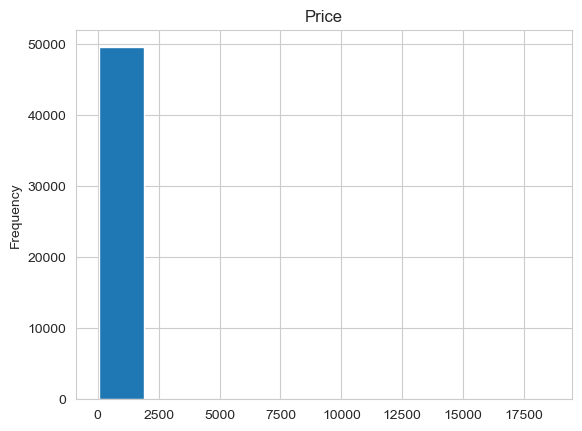

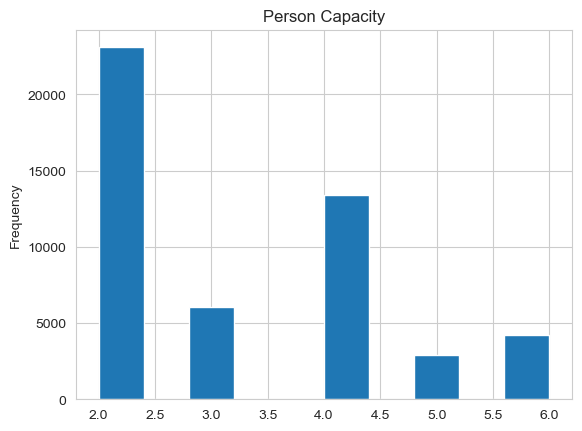

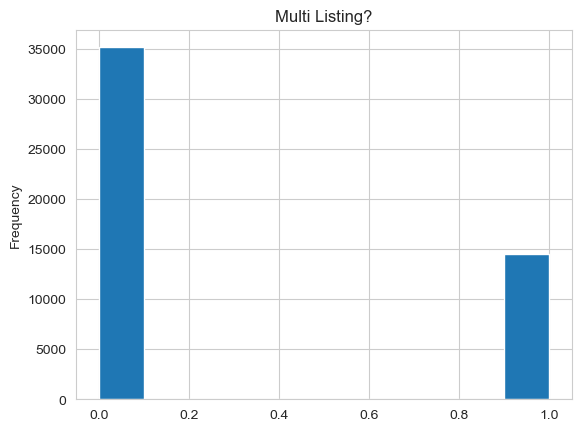

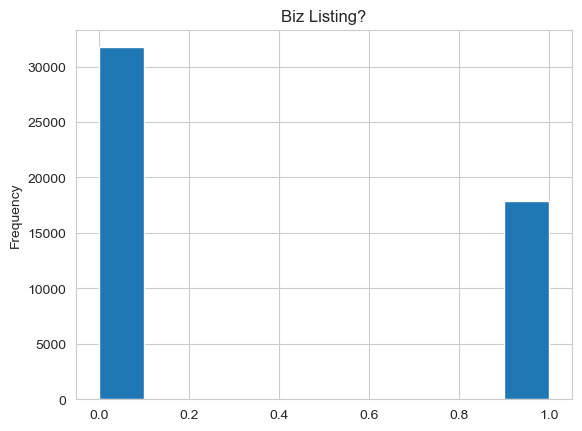

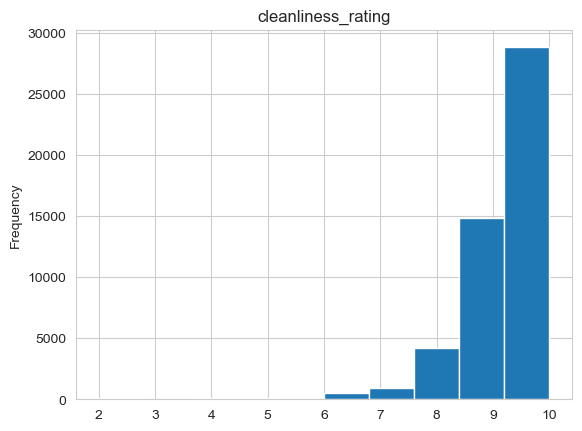

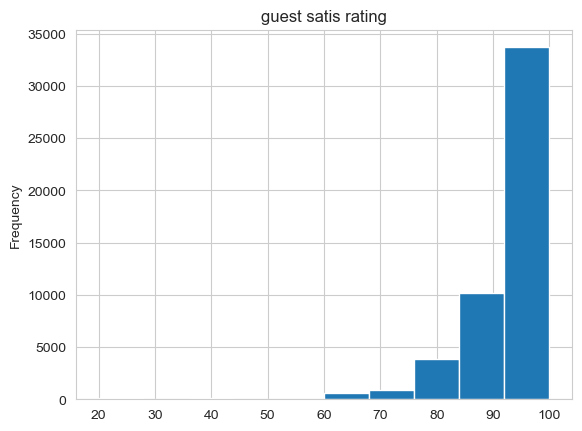

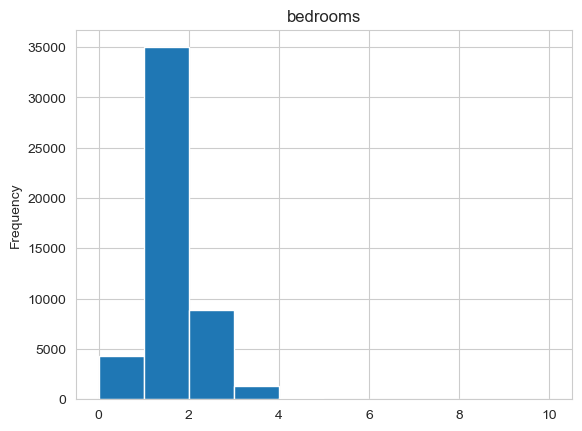

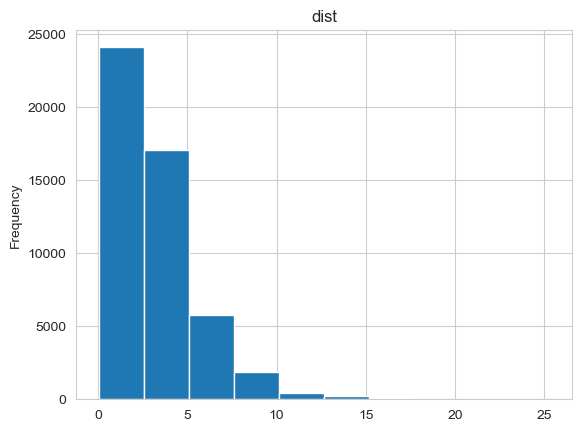

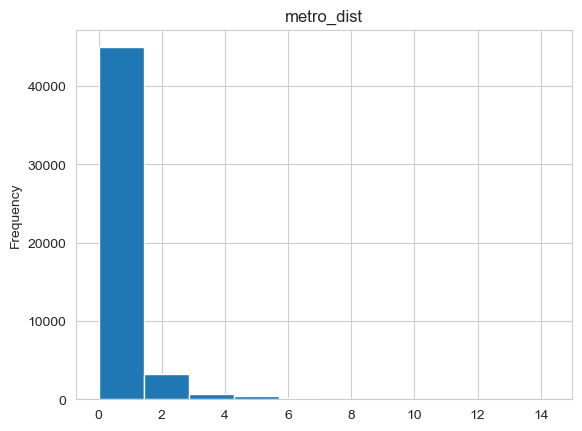

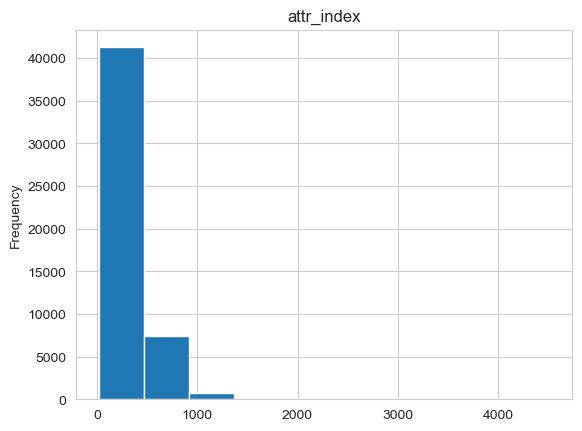

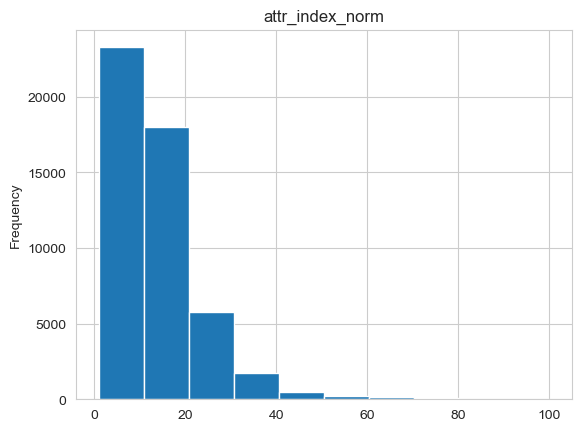

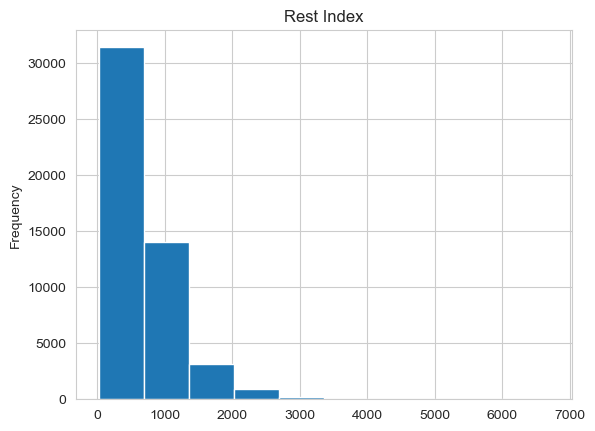

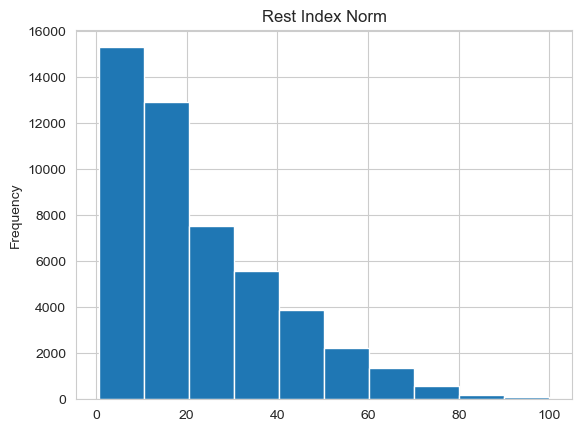

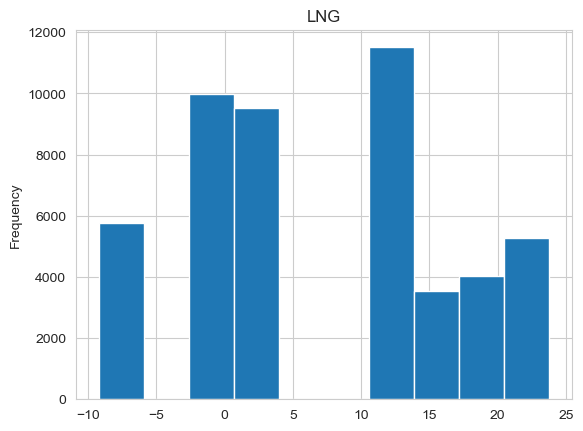

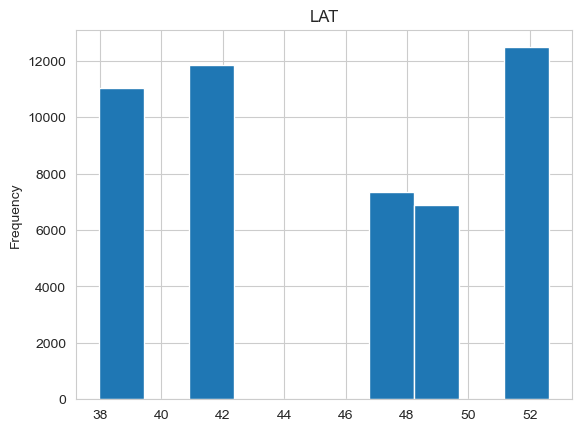

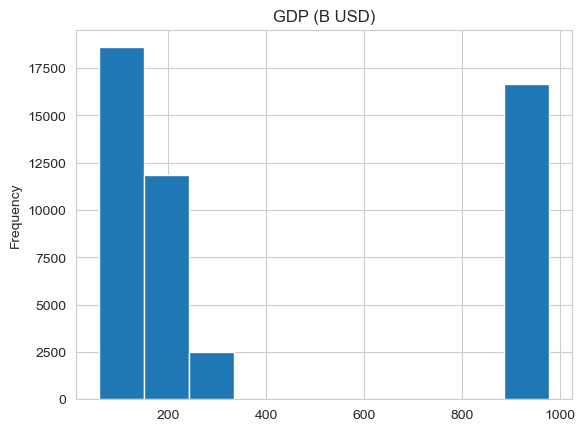

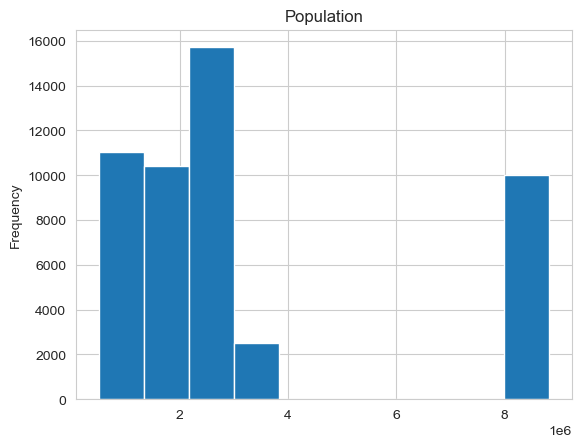

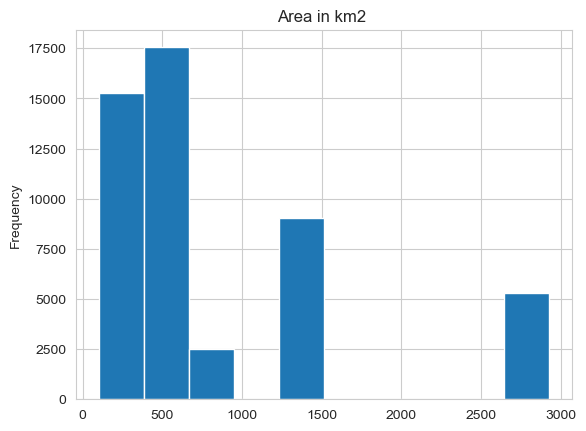

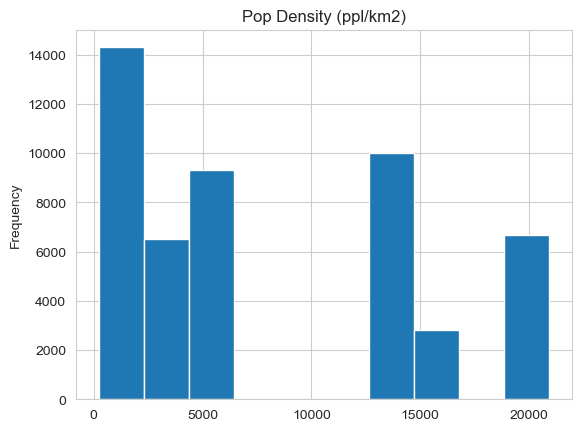

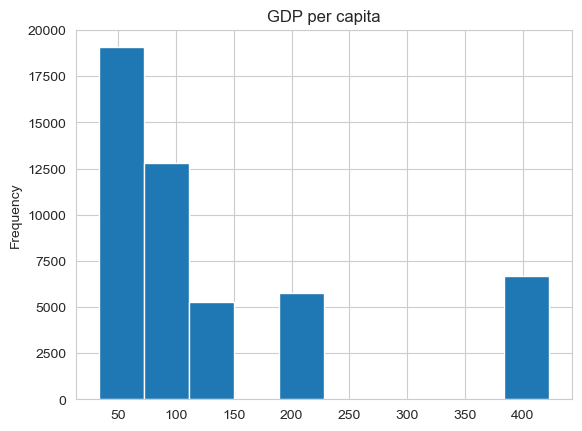

In [27]:
#Let's examine the histogram of these numeric columns
for col in euro_num_cols:
    eurobnb[col].plot(kind = 'hist', title = col)
    plt.show()

- In the outputted histograms above, we can clearly see outliers that are skewing and obfuscating the data (I will cut out the outliers later)

Let's describe the simple data distributions first:

- From above histograms, the features of person capacity, dist, metro dist, attr_index, attr_index_norm, rest_index all follow similar histogram shapes vs price, suggesting they potentially follow a linear regression with price

- Also, there are many features where datapoints are clustered towards a specifc area in the plot, which is not ideal for linear regression analysis. I wish more of these features have more spread out datapoints. 

- Overall, every feature (except bedrooms) does not follow a normal distribution, which is not ideal for this analysis

<Figure size 1000x1000 with 0 Axes>

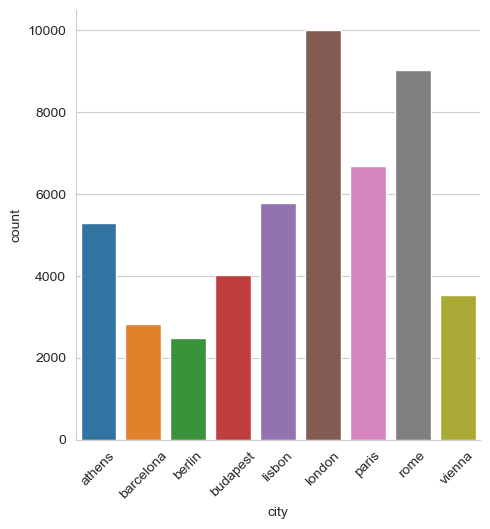

In [28]:
#Let's count the number of datapoints from each city

plt.figure(figsize=(10,10))
plt.rcParams["figure.dpi"]=100
sns.set_style('whitegrid')
sns.catplot(x="city", 
            data=eurobnb, 
            kind="count")

plt.xticks(rotation=45)
plt.show()


Based on the counts above, Berlin, Barcelona, Budapest, and Vienna will weigh much less into the fit for future multivariate Linear Regressions. This will skew the linear regression output towards the more heavily weighted cities, like London and Rome.

Ideally, within this case study, separate multi-variate linear regressions should be computed for each respective city (Unfortunately, not sure I will have time for a more robust model in this curriculum)

Text(0.5, 1.0, 'City vs Price Comparison')

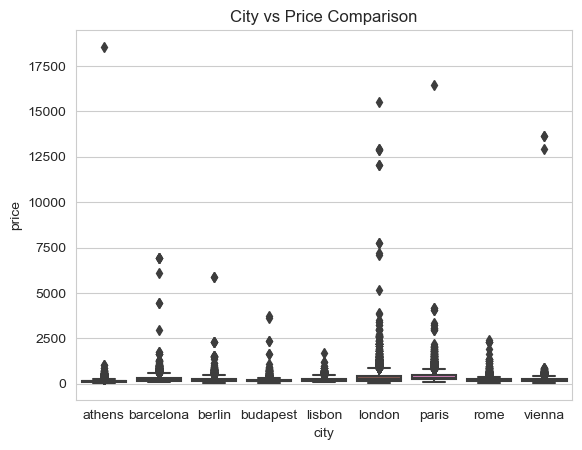

In [29]:
#Creating simple price comparisons between cities
sns.boxplot(data=eurobnb, x = 'city', y = 'Price')
plt.xlabel('city')
plt.ylabel('price')
plt.title('City vs Price Comparison')

Let's remove the outliers in the above plot

<AxesSubplot:xlabel='city', ylabel='Price'>

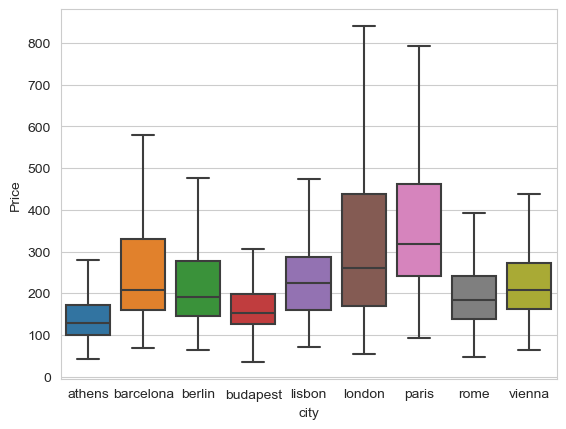

In [30]:
#Creating simple price comparisons between cities 
sns.boxplot(data=eurobnb, x = 'city', y = 'Price', sym='')

Even after removing extreme outliers, the data remains heavily skewed. 

- Most conspicuously, this data suggests each city possesseses different pricing patterns and characteristics

- Furthermore, the data suggests there is no uniform increment in prices (there is heavy kurtosis), as in, Airbnb seems to possess a disproportionate amount of premium priced housing units

- Notes on consumer psychology:
It's important to note that there typically exists a differentiation in consumer psychology for products in the lower and medium price segments vs the premium segments
For instance, in laymen speak, rich people typically spend way more for products for different reasons vs the average consumer vs the bargain shopper when they shop.

- This data suggests I should experiment performing linear regression models separately for the lower to mid segment vs the premium segments because there probably exists different feature vs price patterns in these respective segments (Although not sure I will have time for this more robust prediction engine unfortunately)


Let's create a scatterplot in order to gain a more granular view on price distribution from low to high-end units for each respective city

<AxesSubplot:xlabel='Price', ylabel='Count'>

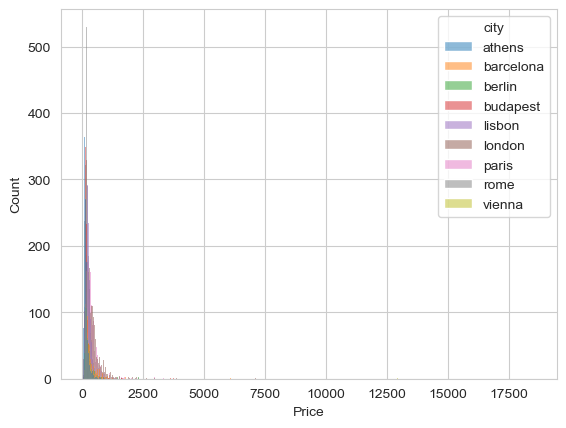

In [31]:

sns.histplot(data=eurobnb, x='Price', hue='city')

Ok, let's obviously clear the outliers for a more meaningful plot 
- Based on the previous boxplots, prices above 860 are the outliers to every city, so let's set a new dataframe that includes prices < 860
- I will have to return later to investigate the characteristics of Airbnb units above 860 to investigate further why Airbnb has such extreme outliers

<AxesSubplot:xlabel='city', ylabel='Price'>

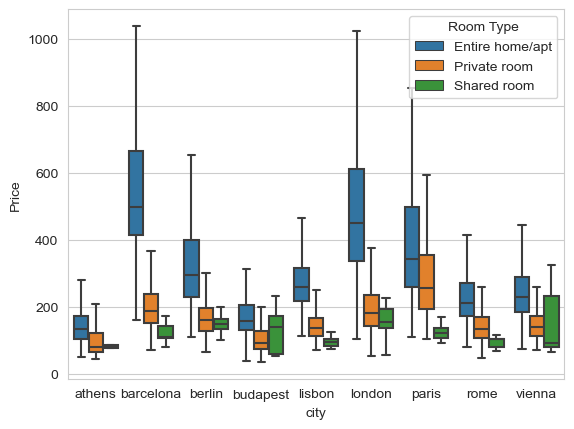

In [32]:
sns.boxplot(data=eurobnb, x = 'city', y = 'Price', hue='Room Type', sym='')

In [33]:
# Plotting the dataframe without outliers

#sns.histplot(data=eurobnb_no, x='Price', hue='city')



Although its difficult to discern, all the cities typically follow a normal distribution of price with a skew (kurtosis) towards the right

- This further confirms the above characterization that Airbnb possesses a heavy emphasis towards premium units

- Personally, I wonder if US Airbnb units follow this skewed distribution (although I don't have this data)

Let's examine the individual cities' price distributions

In [34]:
eurolist = ['barcelona', 'berlin', 'budapest', 'lisbon','rome']
eurolist2 = ['athens', 'london', 'paris', 'vienna']
eurobnb_no = eurobnb[eurobnb['Price'] < 860]

I need to plot the certain cities without the extreme outliers for the plots to show
- I set prices to less than 4000 USD

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_26840\3835822596.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eurobnb[eurobnb['city']==city][eurobnb['Price']<4000]['Price'].hist(bins='auto')


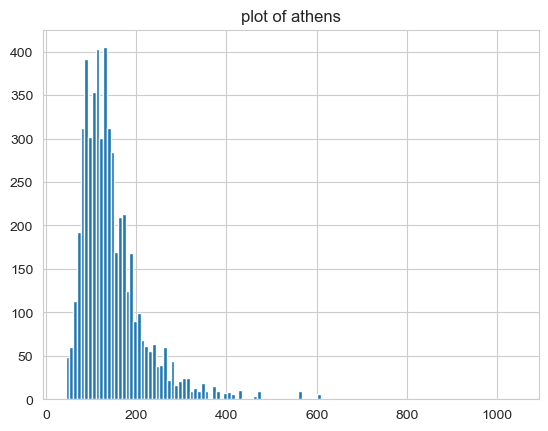

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_26840\3835822596.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eurobnb[eurobnb['city']==city][eurobnb['Price']<4000]['Price'].hist(bins='auto')


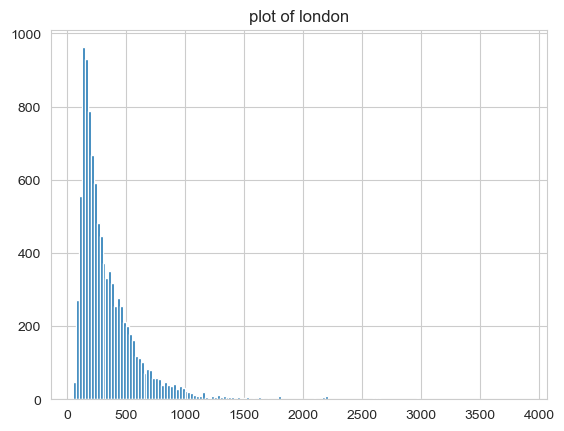

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_26840\3835822596.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eurobnb[eurobnb['city']==city][eurobnb['Price']<4000]['Price'].hist(bins='auto')


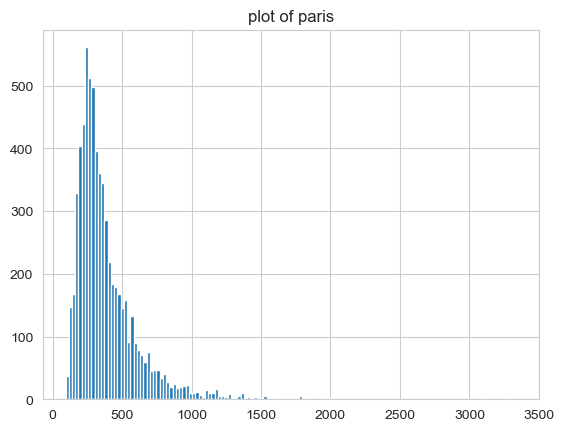

C:\Users\Mark Lee\AppData\Local\Temp\ipykernel_26840\3835822596.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eurobnb[eurobnb['city']==city][eurobnb['Price']<4000]['Price'].hist(bins='auto')


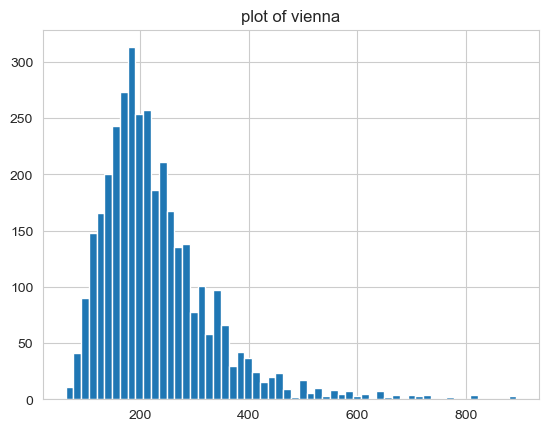

In [35]:
for city in eurolist2:
    eurobnb[eurobnb['city']==city][eurobnb['Price']<4000]['Price'].hist(bins='auto')
    plt.title(f'plot of {city}')
    plt.show()

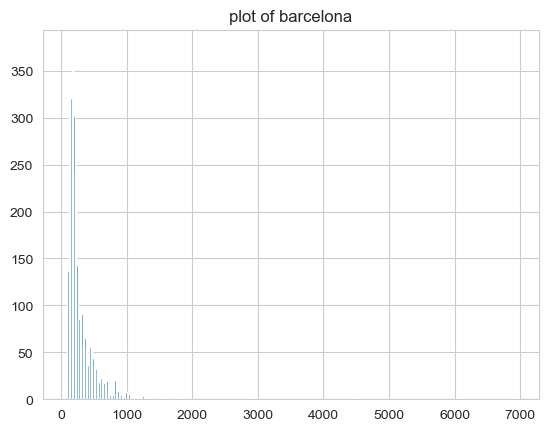

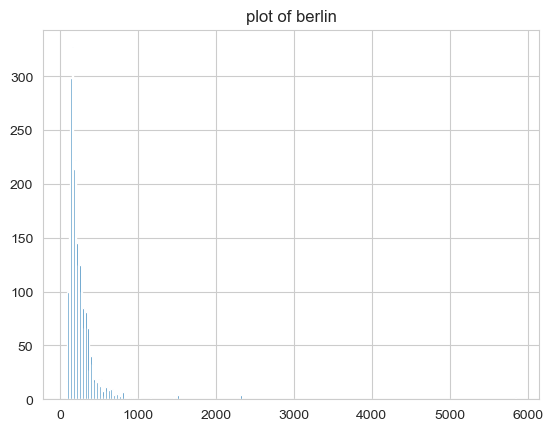

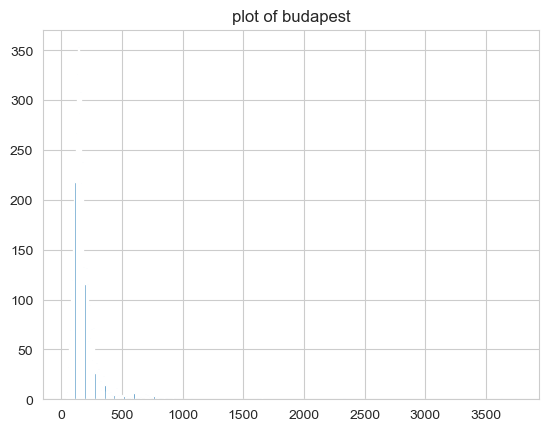

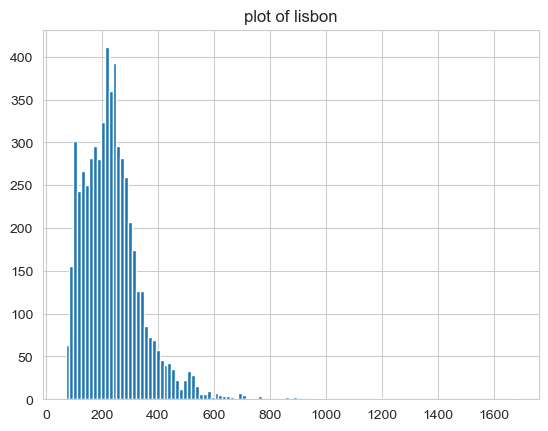

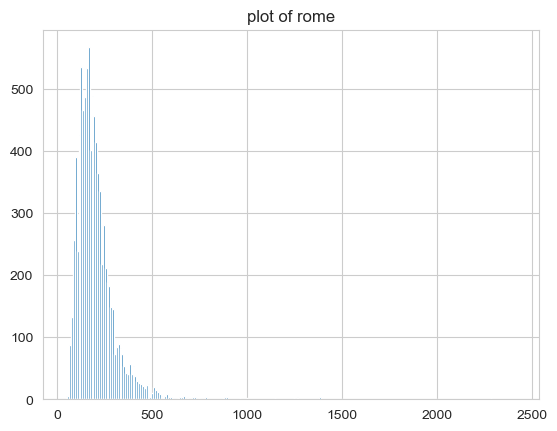

In [36]:
for city in eurolist:
    eurobnb[eurobnb['city']==city]['Price'].hist(bins='auto')
    plt.title(f'plot of {city}')
    plt.show()

<font size='5'>

Let's start incorporating other features into the price vs city equation to investigate strength of relationships between features vs price

We will begin with person capacity

<AxesSubplot:xlabel='city', ylabel='Price'>

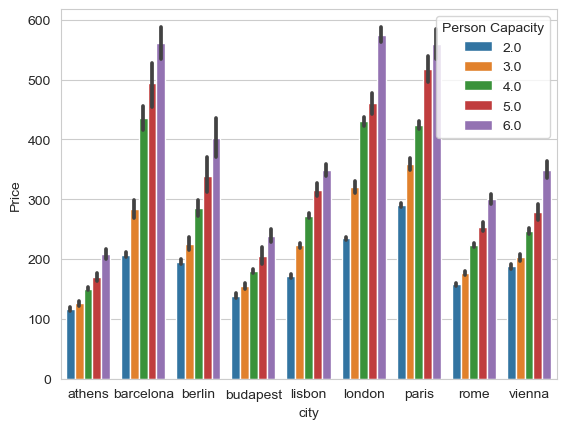

In [37]:

sns.barplot(data=eurobnb_no, x='city', y='Price', hue='Person Capacity')

As expected, the price increments linearly each additionally capacity for a person. 

- This variable will probably figure meaningfully during the linear regression fit model

Side note: Also as expected - and much easier to see via this plot - Western Europe possesses a much higher price segment vs Eastern Europe.


Text(0.5, 1.0, 'City vs Person Capacity vs Price')

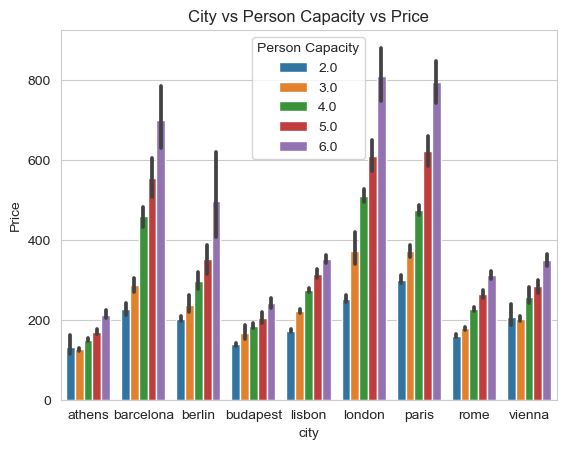

In [38]:
# I'm actually curious if this same relationships holds if we re-incorporate the previously removed outliers

sns.barplot(data=eurobnb, x='city', y='Price', hue='Person Capacity')
plt.title('City vs Person Capacity vs Price')

Ok, the relationship holds and actually helpled sparked the insight that perhaps there are extreme outliers because Airbnb is
not simply hosting simple housing units, but perhaps, also including much bigger mansions and venues onto its platform.

- I need to re-investigate how this dataset defines person capacity, especially the '6' person capacity. Perhaps the biggest venues still input 6 as person capacity despite having a much larger capacity. 
Answer: Actually, there is a wide variance of person capacity vs room type vs price

- This may help explain the extreme outliers

- Furthermore, this investigation may spark insights into formulating a new premium or ultra premium housing market! There is much demand for premium housing


Let's examine person capacity vs price and room type

Text(0.5, 1.0, 'Person Capacity vs Price and Room Type')

<Figure size 1000x1100 with 0 Axes>

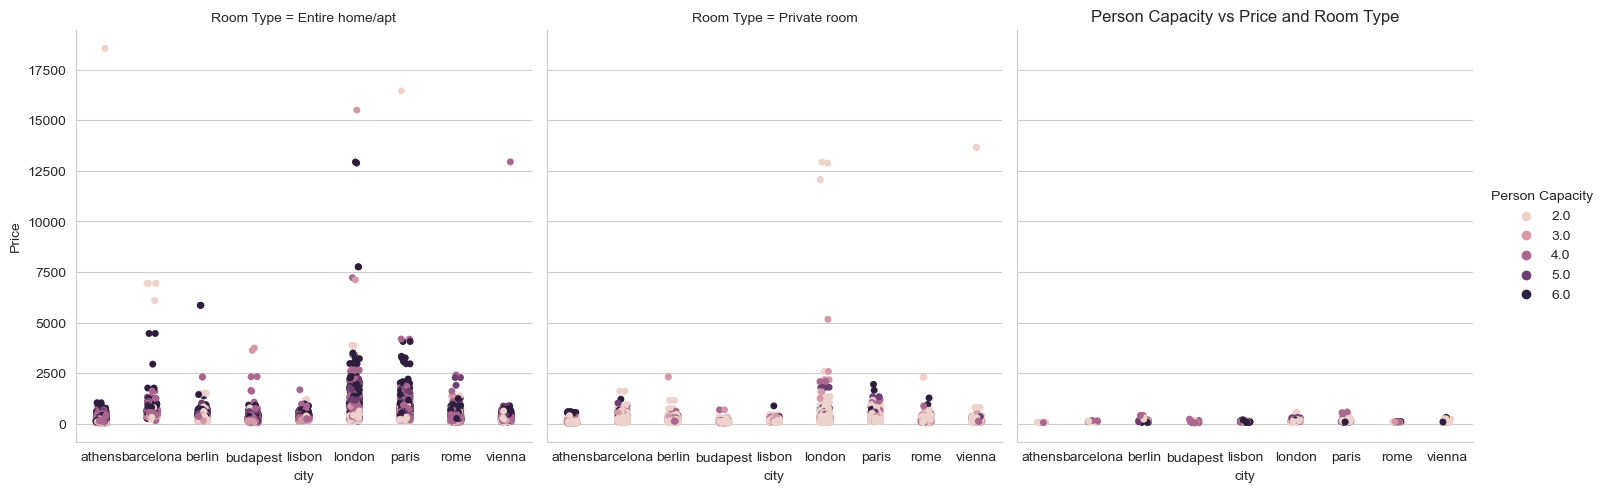

In [39]:
plt.figure(figsize=(10,11))
sns.catplot(data=eurobnb, x='city', y='Price', hue='Person Capacity', col='Room Type')
plt.title('Person Capacity vs Price and Room Type')

<AxesSubplot:xlabel='city', ylabel='Price'>

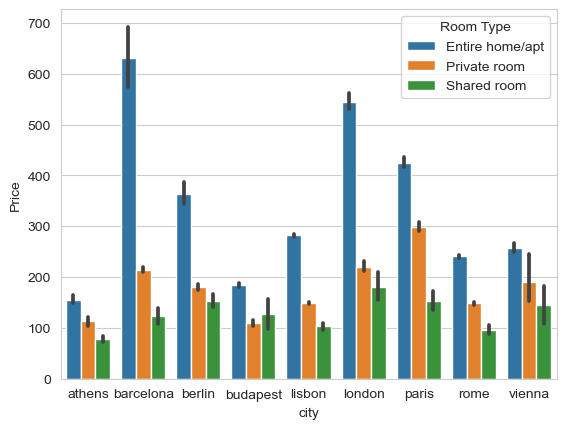

In [40]:
sns.barplot(data=eurobnb, x='city', y='Price', hue='Room Type')

- There is a concrete relationship between room type vs price
- Entire home/apt costs more, which is expected

- This also supports the claim that premium and ultra-premium market may have room for growth!

Let's investigate the above claim even more via a count of each room type

<AxesSubplot:xlabel='Room Type', ylabel='count'>

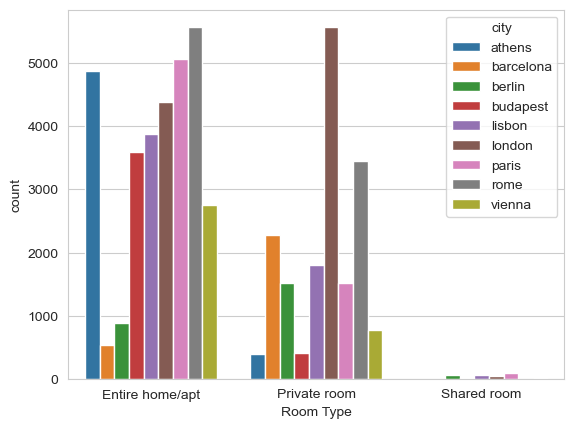

In [41]:
sns.countplot(data=eurobnb, x='Room Type', hue='city')

Let's investigate the proportion of room type for each respective city

In [42]:
roompro = eurobnb.groupby(['city', 'Room Type'])['Room Type'].size()/eurobnb.groupby('city')['Room Type'].size()
roompro


city       Room Type      
athens     Entire home/apt    0.922727
           Private room       0.075189
           Shared room        0.002083
barcelona  Entire home/apt    0.191317
           Private room       0.804448
           Shared room        0.004236
berlin     Entire home/apt    0.355072
           Private room       0.615539
           Shared room        0.029388
budapest   Entire home/apt    0.892342
           Private room       0.104177
           Shared room        0.003481
lisbon     Entire home/apt    0.672913
           Private room       0.314246
           Shared room        0.012841
london     Entire home/apt    0.438707
           Private room       0.556289
           Shared room        0.005004
paris      Entire home/apt    0.757626
           Private room       0.228319
           Shared room        0.014055
rome       Entire home/apt    0.616041
           Private room       0.382630
           Shared room        0.001329
vienna     Entire home/apt    0.77664

In [43]:
roompro = roompro.reset_index(name='proportions')

In [44]:
roompro1 = roompro.sort_values(by=['Room Type', 'proportions'], ascending=True)
roompro1

city        Room Type  proportions
3   barcelona  Entire home/apt     0.191317
6      berlin  Entire home/apt     0.355072
15     london  Entire home/apt     0.438707
21       rome  Entire home/apt     0.616041
12     lisbon  Entire home/apt     0.672913
18      paris  Entire home/apt     0.757626
24     vienna  Entire home/apt     0.776647
9    budapest  Entire home/apt     0.892342
0      athens  Entire home/apt     0.922727
1      athens     Private room     0.075189
10   budapest     Private room     0.104177
25     vienna     Private room     0.218830
19      paris     Private room     0.228319
13     lisbon     Private room     0.314246
22       rome     Private room     0.382630
16     london     Private room     0.556289
7      berlin     Private room     0.615539
4   barcelona     Private room     0.804448
23       rome      Shared room     0.001329
2      athens      Shared room     0.002083
11   budapest      Shared room     0.003481
5   barcelona      Shared room     0.004236
26     vienna      Shared room     0.004524
17     london      Shared room     0.005004
14     lisbon      Shared room     0.012841
20      paris      Shared room     0.014055
8      berlin      Shared room     0.029388

<AxesSubplot:xlabel='city', ylabel='proportions'>

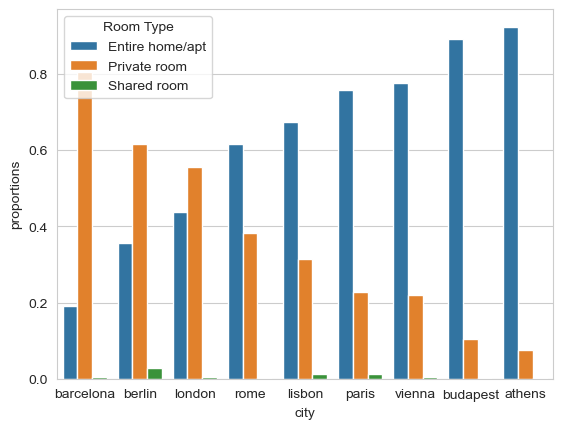

In [45]:
sns.barplot(data=roompro1, x='city', y='proportions', hue='Room Type')

<font size ='3'>
    
As easily seen, every city has their own supply characteristics of entire rooms/apts vs private rooms. 
    
- However, of note, why is Barcelona at such extreme lows? (under 20%). While most cities (except 2) have over 60%.
- Likewise, Barcelona, Berlin, and London are the only cities with over 40% of units as private rooms.
- Inversely, why does Athens and Budapest have such extremely low percentage of privates rooms at below 10%?
    

<Figure size 1000x2500 with 0 Axes>

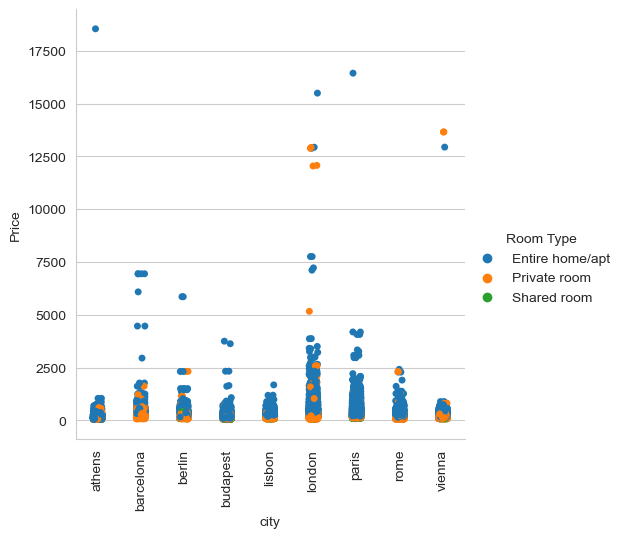

In [46]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

Of note: Why does London, Paris, Vienna, and Athens have such extreme positive outliers? Answer, because they offer unique experiences such as castles, villas, chatauex, palaces etc
- Perhaps there is an ultra-premium market still untapped in other cities with no outliers. Can AirBnb replicate the formula of the above city's for the other cities with no outliers? 
- If Vienna has such extreme outliers - a relatively non-expensive city - can this market and experience be replicated to other non-expensive cities? 
- Can AirBnb form a new 'status' and luxury brand for these ultra-high segments overall?

In [47]:
eurobnb4 = eurobnb[eurobnb['Person Capacity']>4]

<Figure size 1000x2500 with 0 Axes>

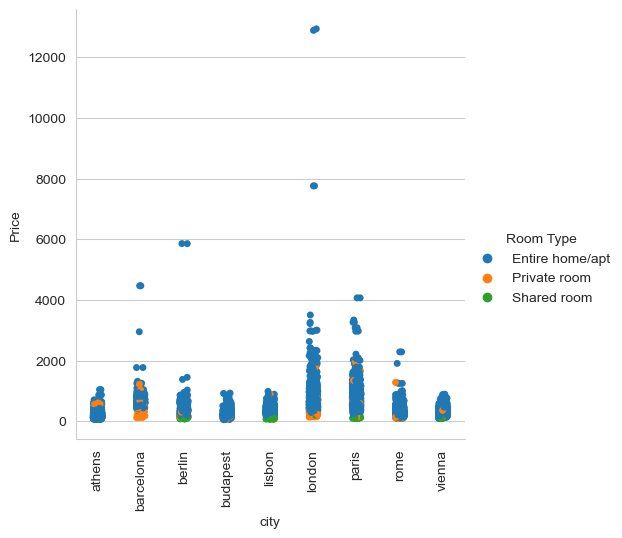

In [48]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb4, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

Let's cut off the ultra-high-priced segment to examine the (ordinary) luxury segment

In [50]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb_no4500, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

NameError: name 'eurobnb_no4500' is not defined

<Figure size 1000x2500 with 0 Axes>

Of note: Barcelona seems to exhibit much higher price gradient for private rooms? Why

<Figure size 1000x2500 with 0 Axes>

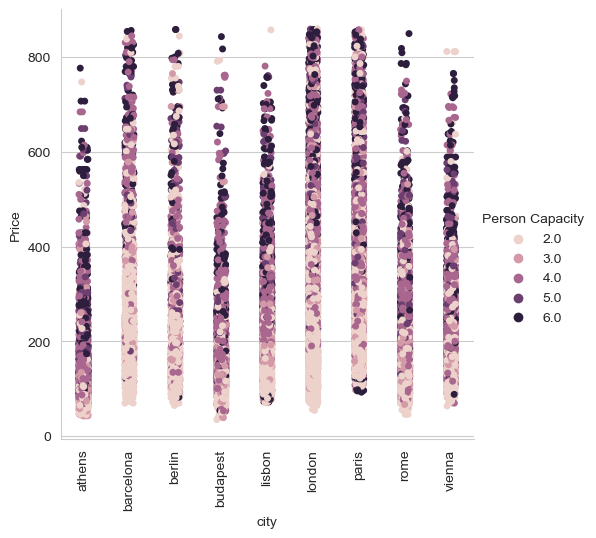

In [53]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb_no, x='city', y='Price', hue='Person Capacity')
plt.xticks(rotation=90);

In [54]:
eurobnb_no4 = eurobnb_no[eurobnb_no['Person Capacity']>3]

<Figure size 1000x2500 with 0 Axes>

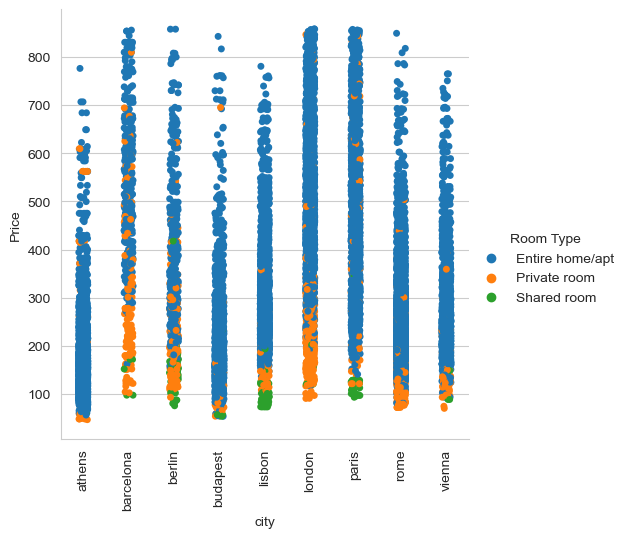

In [55]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb_no4, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

Let's examine the normal price segment (under 400 USD)

In [56]:
eurobnb_no400 = eurobnb[eurobnb['Price']<400]
eurobnb_no100 = eurobnb[eurobnb['Price']<100]

<Figure size 1000x2500 with 0 Axes>

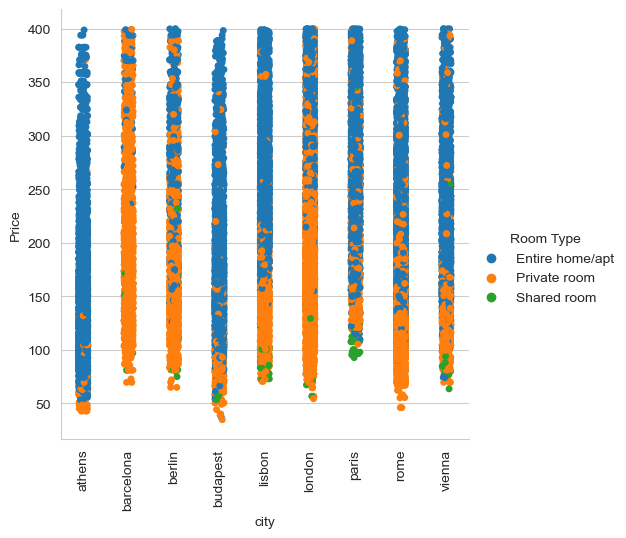

In [57]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb_no400, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

In [58]:
eurobnb_no4003 = eurobnb_no400[eurobnb_no400['Person Capacity']>3]

<Figure size 1000x2500 with 0 Axes>

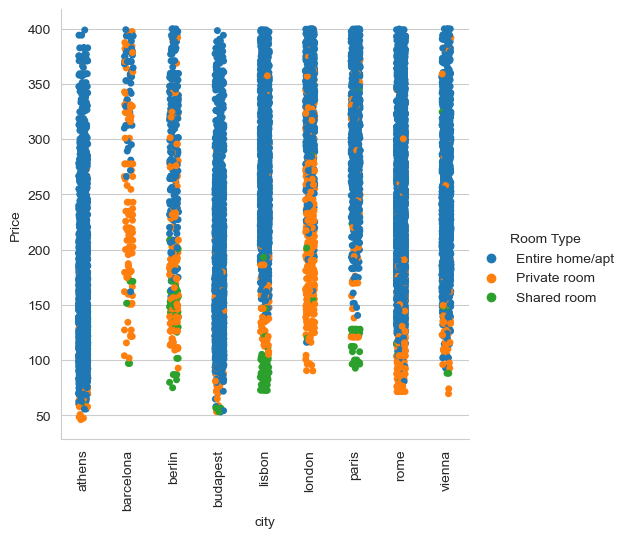

In [59]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb_no4003, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

In [60]:
eurobnb_no1003 = eurobnb_no100[eurobnb_no100['Person Capacity']>3]

<Figure size 1000x2500 with 0 Axes>

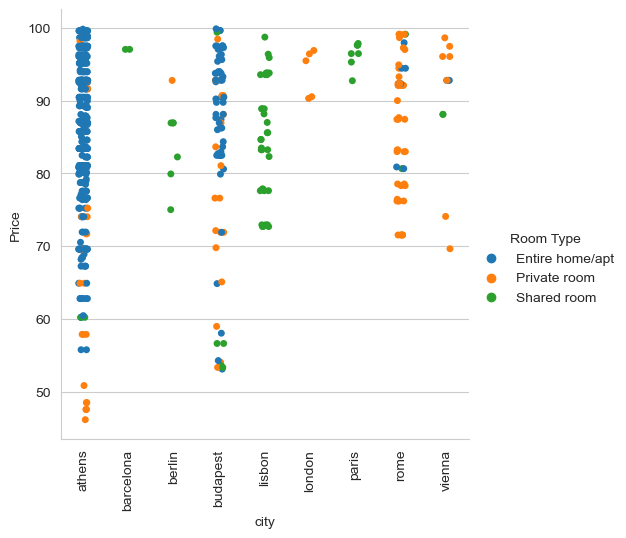

In [61]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb_no1003, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

Why does Barcelona have such a high proportion of private rooms in the normal to high price segments?

In [62]:
proportions = eurobnb.groupby(['city', 'Room Type']).size()/eurobnb.groupby(['city']).size()
proportions = proportions.reset_index(name='proportion')
pro = proportions[proportions['Room Type']=='Private room'].sort_values(by='proportion')



<AxesSubplot:xlabel='city', ylabel='proportion'>

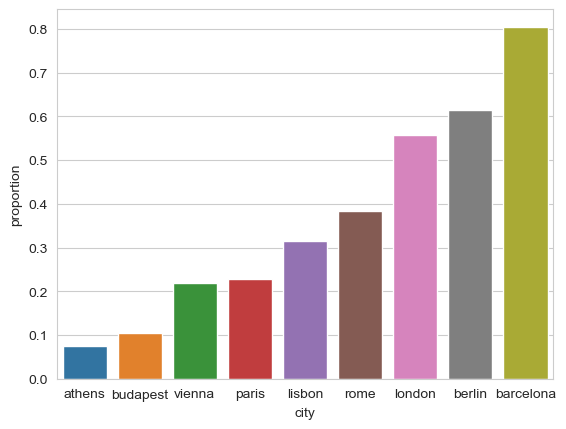

In [63]:
sns.barplot(data=pro, x='city', y='proportion')

As you can easily see, Barcelona tops the list of proportion of units categorized as Private Rooms, but why?
- Similarly, why is Athens so low?

Perhaps Athens can increase their percentage private rooms and Barcelona can increase their percentage of Entire homes/apts etc


Let's examine the bargain price segment

<Figure size 1000x2500 with 0 Axes>

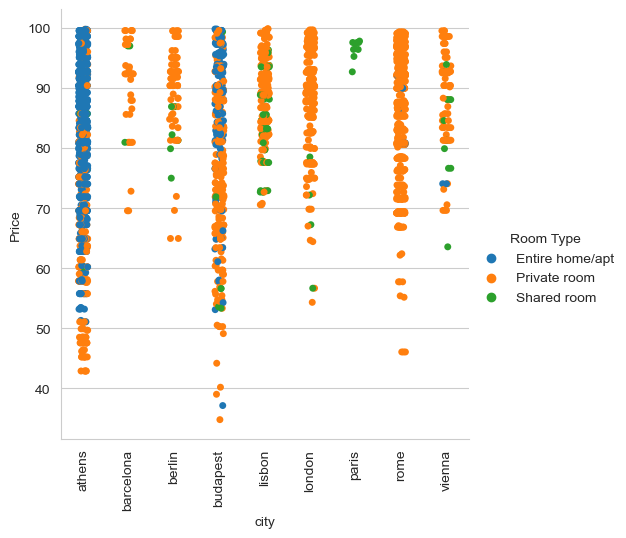

In [64]:
plt.figure(figsize=(10,25))
sns.catplot(data=eurobnb_no100, x='city', y='Price', hue='Room Type')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Person Capacity vs Price and Room Type')

<Figure size 1000x1100 with 0 Axes>

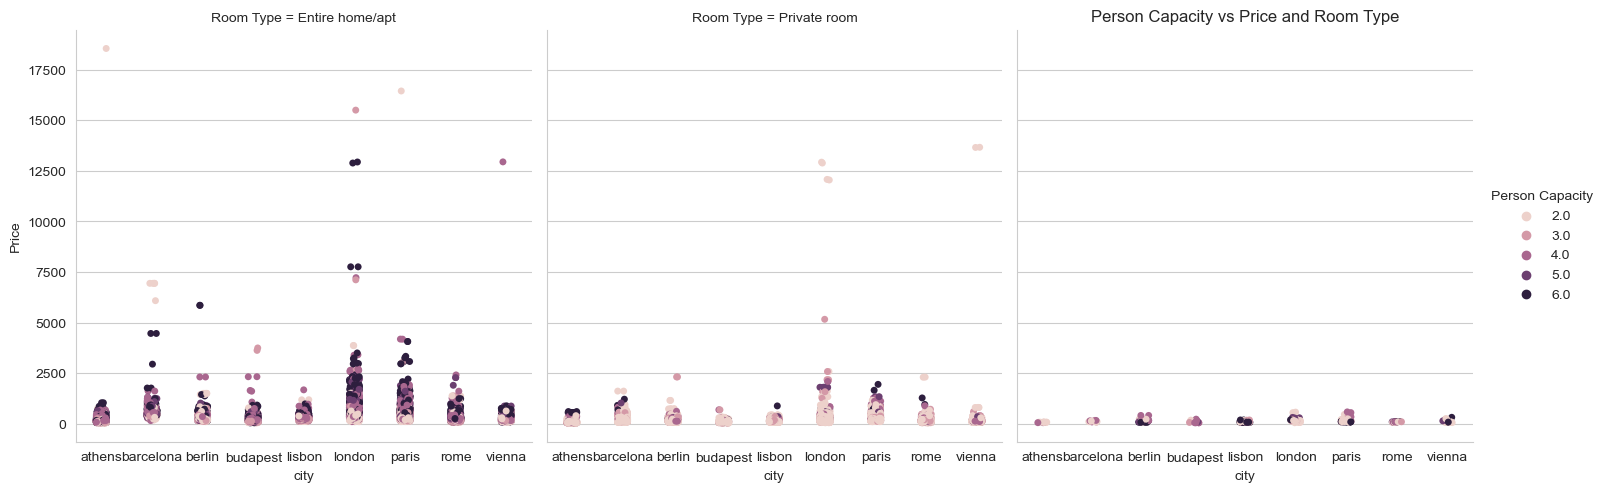

In [65]:
plt.figure(figsize=(10,11))
sns.catplot(data=eurobnb, x='city', y='Price', hue='Person Capacity', col='Room Type')
plt.title('Person Capacity vs Price and Room Type')

Examining prices under 100, you can see that private room take up the largest shares of this segment

- Athens, Budapest, and then Rome exhibit the lowest prices in the segment
- Athens holds entire homes/apts for the cheapest, even under 55 USD
- On the other extreme, Paris contains barely any room under 100, and they are shared

Let's examine person capacity vs price by room type more closely

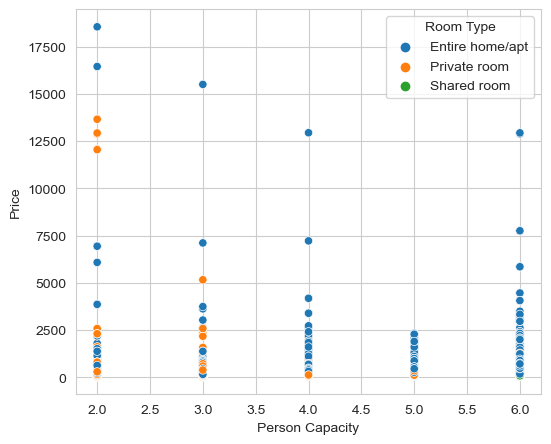

In [68]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=eurobnb, x='Person Capacity', y='Price', hue='Room Type');

It seems there is even a (wide) disperson for each Room Type by Person Capacity

- Need to investigate why this disperson exists
- For instance, why are entire homes/castles/villas etc listed for 2 person homes etc only, and at such high prices?
- It seems for these Airbnb features, the bedroom and person capacity do not correlate with price, and in fact, can mix up the eventual ML regressors. For instance, a high priced 17k USD unit can be categorized as 2 person capacity + entire home, while a low-end 90 USD unit can also be categorized as a 2 person capacity + entire home. 

Text(0.5, 1.0, 'Person Capacity vs Price and Room Type')

<Figure size 1000x1100 with 0 Axes>

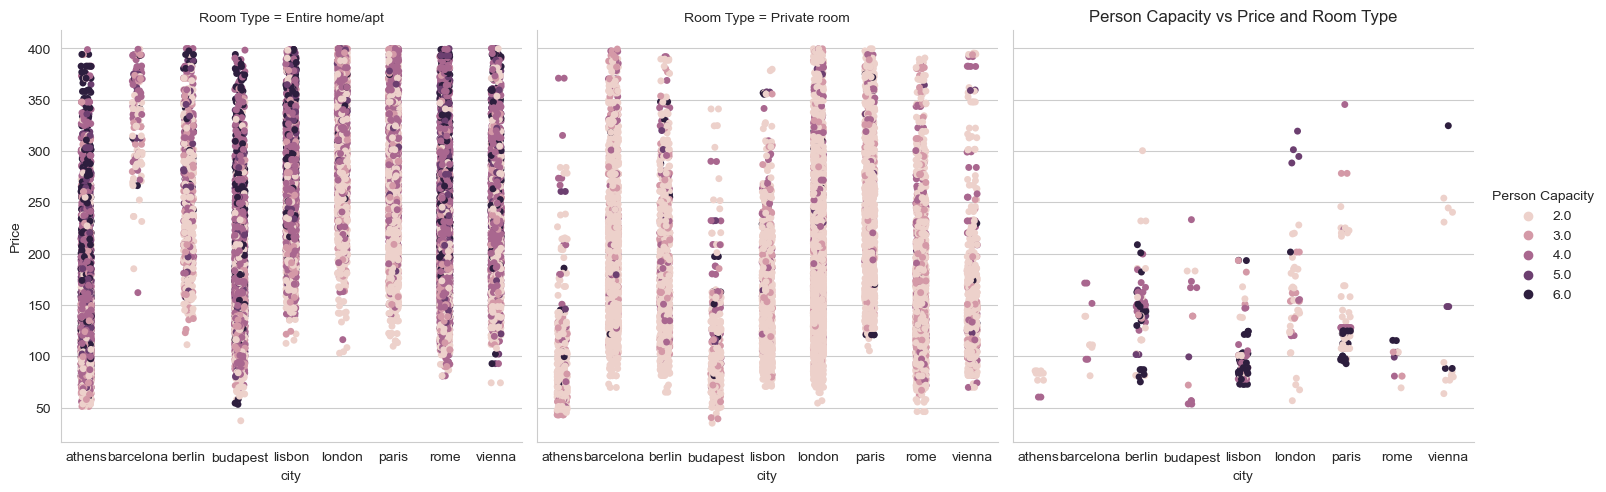

In [69]:
plt.figure(figsize=(10,11))
sns.catplot(data=eurobnb_no400, x='city', y='Price', hue='Person Capacity', col='Room Type')
plt.title('Person Capacity vs Price and Room Type')

In [70]:
eurobnb.columns

Index(['Price', 'Room Type', 'Shared Room', 'Private Room', 'Person Capacity',
       'Superhost?', 'Multi Listing?', 'Biz Listing?', 'cleanliness_rating',
       'guest satis rating', 'bedrooms', 'dist', 'metro_dist', 'attr_index',
       'attr_index_norm', 'Rest Index', 'Rest Index Norm', 'LNG', 'LAT',
       'Weekday/Weekend', 'city', 'GDP (B USD)', 'Country', 'Population',
       'Area in km2 ', 'Pop Density (ppl/km2)', 'GDP per capita'],
      dtype='object')

<AxesSubplot:xlabel='city', ylabel='GDP (B USD)'>

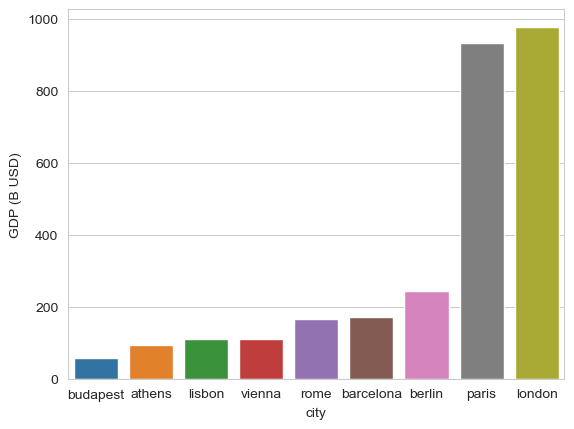

In [71]:
eurobnb_sorted = eurobnb.sort_values(by='GDP (B USD)')
sns.barplot(data=eurobnb_sorted, x='city', y='GDP (B USD)')

Analysis:
- When normalized by GDP of city, price gradient of private rooms makes sense
- Less economically productive cities have less private rooms at higher prices
- This makes sense for multitude of factors, but most notably, high-rentals are relative to average salary in the city

However:
- The above price gradients do not hold for the luxury and ultra-luxury units, especially for entire homes
- The premium segment follows different price dynamics 

Let's examine other features vs Price

Below is a visualization of Superhost Vs Price

<AxesSubplot:xlabel='city', ylabel='Price'>

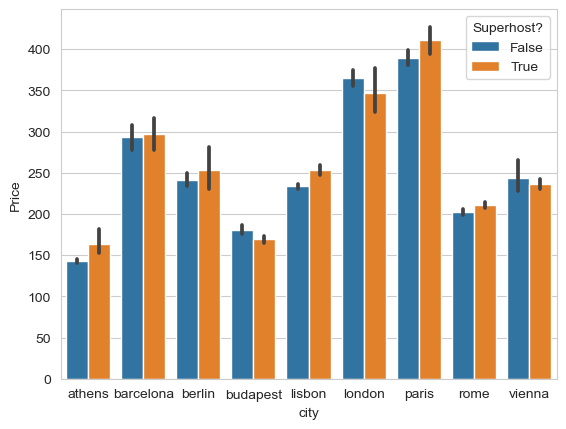

In [72]:
sns.barplot(data=eurobnb, x='city', y='Price', hue='Superhost?')

- Superhost vs not superhost prices actually do not diverge as significantly as I personally expected

Let's examine Guest Satisfaction Rating vs Price

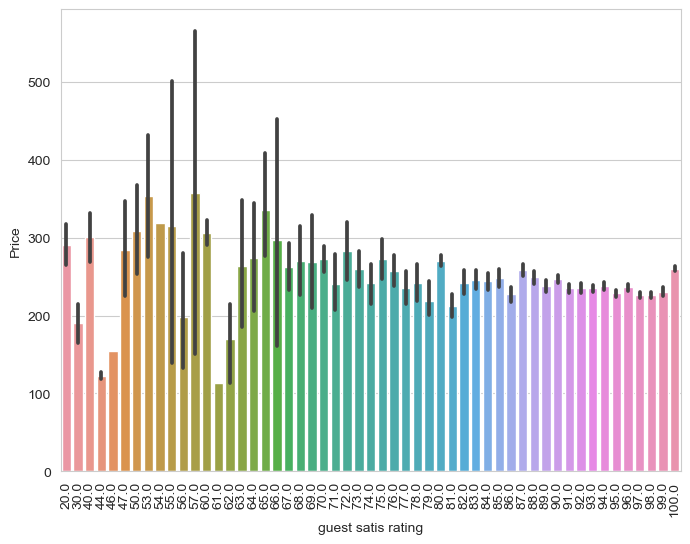

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(data=eurobnb_no, x='guest satis rating', y='Price')
plt.xticks(rotation=90);

- There does not exist a strong linear relationships between customer satisfaction rating vs price
- I'm aware in the future I can pd.cut the "Guest Satis Rating" column into smaller categories before plotting it vs price

- It appears consumers do not pay much attention to guest satisfaction ratings when shopping for rooms

Let's examine GDP per capita of city vs Price

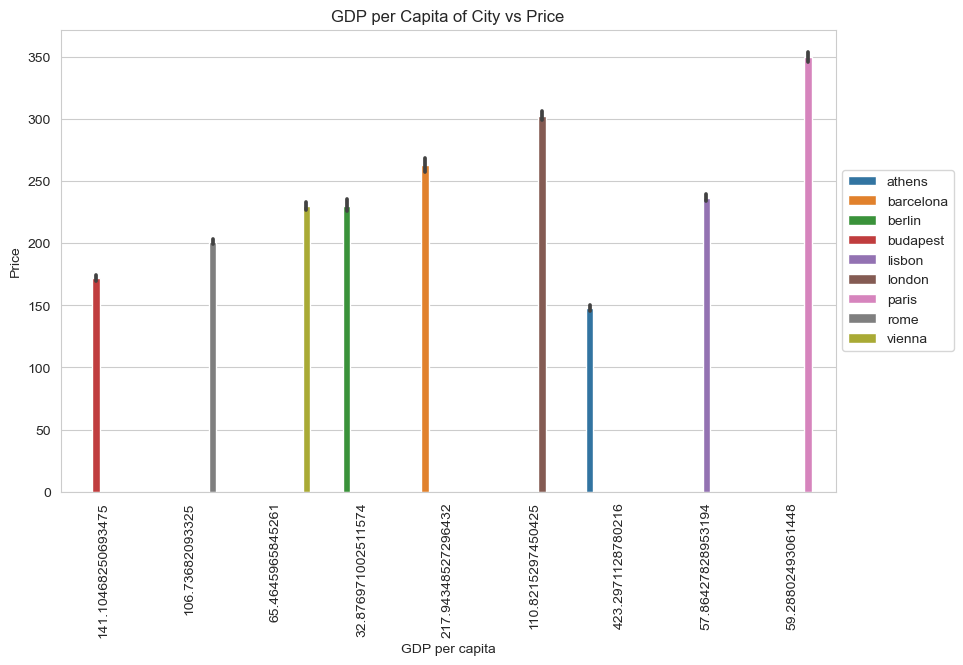

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=eurobnb_no, x='GDP per capita', y='Price', hue='city')
plt.title('GDP per Capita of City vs Price')
plt.xticks(rotation=90)
x_tick_labels = eurobnb_no['GDP per capita'].unique()  
ax.set_xticks(range(len(x_tick_labels)))
ax.set_xticklabels(x_tick_labels, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

- There exists a weak linear relationship between GDP per capita of the respective cities vs price

Let's examine attraction index vs Price

<AxesSubplot:xlabel='attr_index_norm', ylabel='Price'>

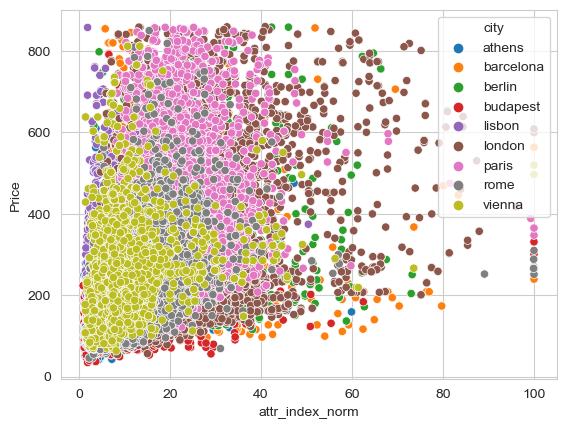

In [75]:
sns.scatterplot(data=eurobnb_no, x='attr_index_norm', y='Price', hue='city')

- Surprisingly, there exists a very, very rough (but almost non-existent) relationship between attraction index norm vs price

Let's examine distance (from city center) vs Price

<AxesSubplot:xlabel='dist', ylabel='Price'>

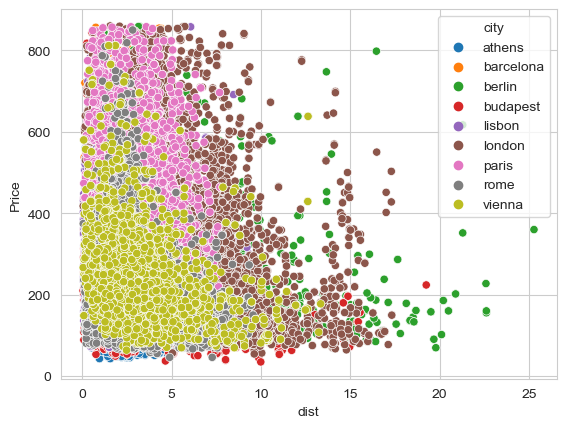

In [76]:
sns.scatterplot(data=eurobnb_no, x='dist', y='Price', hue='city')


- There exist a rough, nearly non-existent correlation between price vs dist 

- Based on the above plots and relationships, most of these features do not seem to possess a high correlation vs price (although I'm aware there are more variables to plot)
- I don't have high hopes for the predictive engine that arises from this case study

Instead of plotting more variables to see how they correlate with price, let's produce a correlation matrix/heatmap

But in order to perform this function, let's remove the categorical variables and include only numeric features (which we did above)

<AxesSubplot:>

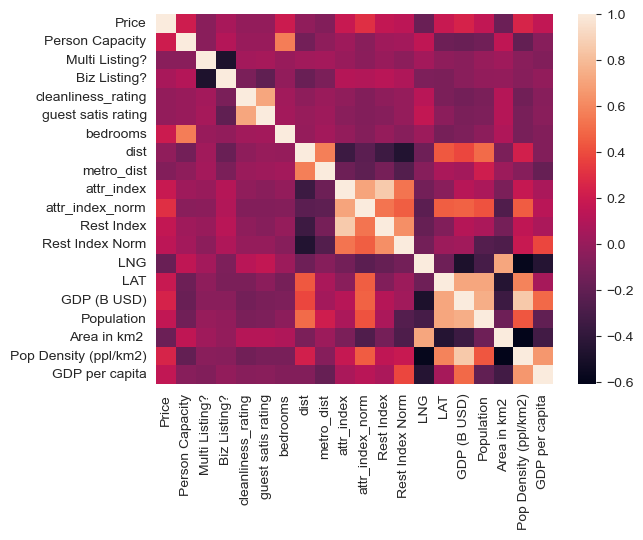

In [77]:
sns.heatmap(data=eurobnb[euro_num_cols].corr())

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


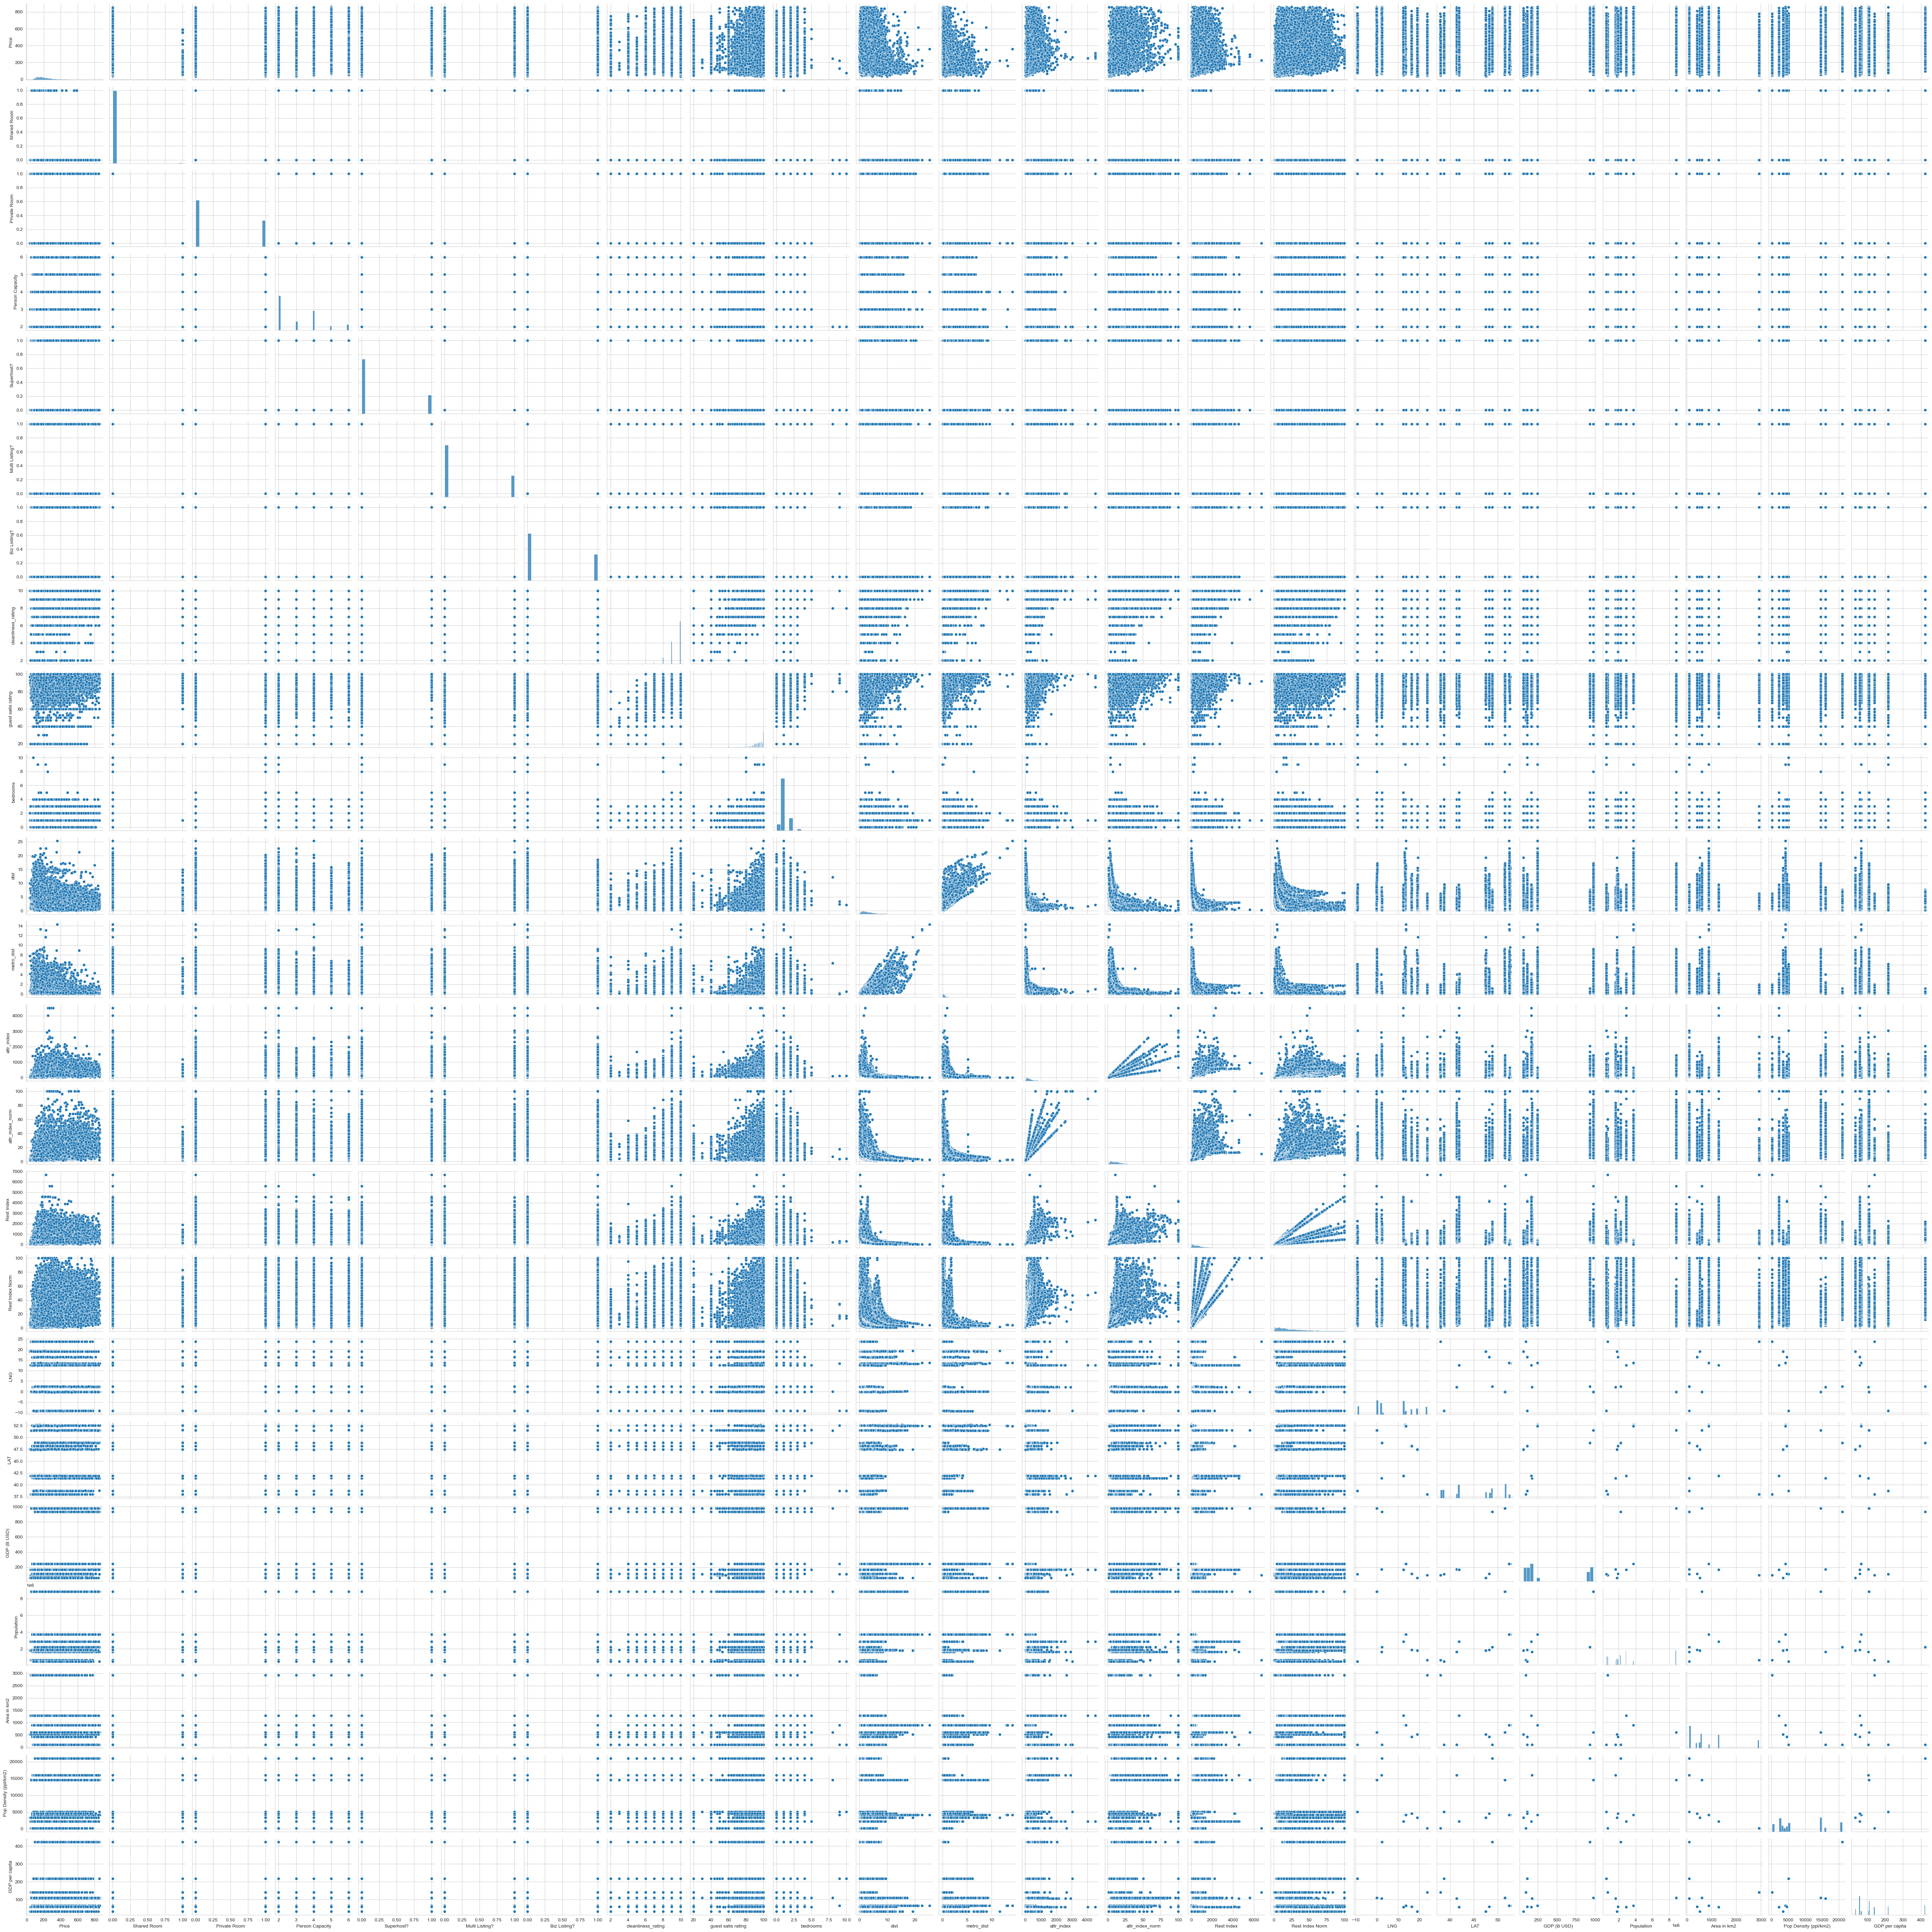

In [78]:
sns.pairplot(eurobnb_no)

Through the heatmap and pairplot, you can easily see that there does not exist any strong relationships between any variable with price
- However, multicollinearity does exist with many features

Conclusion: 

EDA, and more specifically, investigating the individual columns along with the bivariate relationships, unearthed interesting characteristics that AirBnb can potentially utilize to increase its bottomline

    
Hopefully, the Machine Learning models can understand the more complex patterns and relationships with the room features and price to determine the important characteristics to increase AirBnb units competitive advantage